# 🎯 Understanding Attention Mechanisms with Visualization -- University of South Florida NLP Spring 2025
# Dr. Ankur Mali
In this tutorial, we will explore how attention mechanisms work in sequence models like encoder-decoder architectures -- Refer to slides for detailed description .

We will:
- Compute attention scores and weights.
- Visualize attention distributions.
- Understand how the model “attends” to different inputs.


## 🔶 Soft Attention (Bahdanau Style)

Given encoder hidden states \( h_1, $\dots$, h_n \) and decoder state \( s_t \), the attention mechanism computes:

\[
$e_{ti}$ = $v_a^\top \tanh(W_1 h_i^\top + W_2 s_t^\top)
\quad\quad
\alpha_{ti} = \frac{\exp(e_{ti})}{\sum_j \exp(e_{tj})}
\quad\quad
c_t = \sum_i \alpha_{ti} h_i
$\]


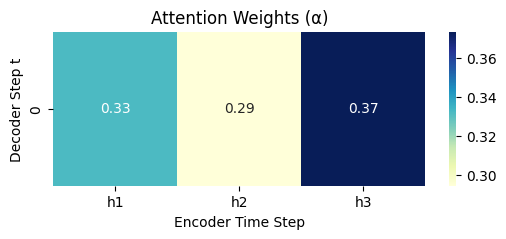

Context Vector c_t: [1.45238856 1.3322346 ]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulated encoder hidden states (3 time steps, 2-dimensional)
H = np.array([
    [1, 2],
    [0, 1],
    [3, 1]
])

s_t = np.array([0.5, 0.5])

W1 = np.array([[1, 0], [0, 1]])
W2 = np.array([[1, 1], [0, 1]])
v_a = np.array([1, -1])

# Compute attention scores
def compute_attention_scores(H, s_t, W1, W2, v_a):
    scores = []
    for h_i in H:
        z = np.tanh(W1 @ h_i + W2 @ s_t)
        score = v_a @ z
        scores.append(score)
    return np.array(scores)

e_t = compute_attention_scores(H, s_t, W1, W2, v_a)
alpha_t = np.exp(e_t) / np.sum(np.exp(e_t))

# Visualize attention weights
plt.figure(figsize=(6, 2))
sns.heatmap([alpha_t], annot=True, cmap="YlGnBu", xticklabels=["h1", "h2", "h3"])
plt.title("Attention Weights (α)")
plt.xlabel("Encoder Time Step")
plt.ylabel("Decoder Step t")
plt.show()

# Compute context vector
c_t = alpha_t @ H
print("Context Vector c_t:", c_t)


## 🔷 Dot Product Attention

Simpler than additive attention:

\[
$e_{ti} = s_t \cdot h_i^\top
\quad\quad
\alpha_{ti} = \text{softmax}(e_t)
\quad\quad
c_t = \sum_i \alpha_{ti} h_i $
\]


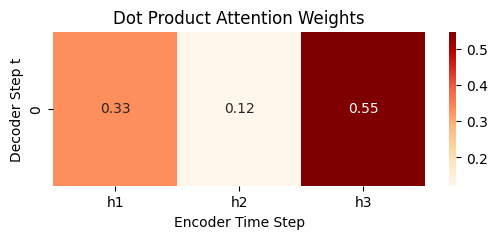

Dot Product Context Vector: [1.97114712 1.33149896]


In [2]:
# Dot product attention
e_dot = H @ s_t  # (3,)
alpha_dot = np.exp(e_dot) / np.sum(np.exp(e_dot))

# Visualization
plt.figure(figsize=(6, 2))
sns.heatmap([alpha_dot], annot=True, cmap="OrRd", xticklabels=["h1", "h2", "h3"])
plt.title("Dot Product Attention Weights")
plt.xlabel("Encoder Time Step")
plt.ylabel("Decoder Step t")
plt.show()

# Context vector
c_dot = alpha_dot @ H
print("Dot Product Context Vector:", c_dot)


## 🔸 Hard Attention (Stochastic)

Instead of a soft weighted sum, we sample one \( h_i \) based on the distribution \( \alpha_t \):

\[
$i^* \sim \text{Categorical}(\alpha_t), \quad c_t = h_{i^*}$
\]


In [3]:
# Sample from soft attention weights
np.random.seed(42)
i_star = np.random.choice([0, 1, 2], p=alpha_t)
c_hard = H[i_star]

print(f"Sampled index: {i_star} (h_{i_star+1})")
print("Hard Attention Context Vector:", c_hard)


Sampled index: 1 (h_2)
Hard Attention Context Vector: [0 1]


In [5]:
from ipywidgets import interact, FloatSlider

def explore_attention(s1=0.5, s2=0.5):
    s_t = np.array([s1, s2])
    e = compute_attention_scores(H, s_t, W1, W2, v_a)
    alpha = np.exp(e) / np.sum(np.exp(e))

    plt.figure(figsize=(6, 2))
    sns.heatmap([alpha], annot=True, cmap="coolwarm", xticklabels=["h1", "h2", "h3"])
    plt.title(f"Attention Weights for s_t = [{s1:.2f}, {s2:.2f}]")
    plt.xlabel("Encoder Time Step")
    plt.show()

    c = alpha @ H
    print("Context Vector:", c)

interact(
    explore_attention,
    s1=FloatSlider(value=0, min=-2, max=2, step=0.1),
    s2=FloatSlider(value=0, min=-2, max=2, step=0.1)
);

interactive(children=(FloatSlider(value=0.0, description='s1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, FloatSlider, Dropdown

# Encoder hidden states
H = np.array([
    [1, 2],
    [0, 1],
    [3, 1]
])

# Attention parameters
W1 = np.array([[1, 0], [0, 1]])
W2 = np.array([[1, 1], [0, 1]])
v_a = np.array([1, -1])

def compute_soft_attention(H, s_t):
    scores = []
    for h_i in H:
        z = np.tanh(W1 @ h_i + W2 @ s_t)
        score = v_a @ z
        scores.append(score)
    e_t = np.array(scores)
    alpha = np.exp(e_t) / np.sum(np.exp(e_t))
    c_t = alpha @ H
    return alpha, c_t

def compute_dot_attention(H, s_t):
    e_t = H @ s_t
    alpha = np.exp(e_t) / np.sum(np.exp(e_t))
    c_t = alpha @ H
    return alpha, c_t

def compute_hard_attention(H, s_t):
    alpha, _ = compute_soft_attention(H, s_t)  # use soft for sampling
    idx = np.random.choice(len(H), p=alpha)
    alpha_one_hot = np.zeros_like(alpha)
    alpha_one_hot[idx] = 1.0
    c_t = H[idx]
    return alpha_one_hot, c_t

def explore_attention(s1, s2, attention_type):
    s_t = np.array([s1, s2])

    if attention_type == 'Soft':
        alpha, c_t = compute_soft_attention(H, s_t)
    elif attention_type == 'Dot Product':
        alpha, c_t = compute_dot_attention(H, s_t)
    elif attention_type == 'Hard':
        alpha, c_t = compute_hard_attention(H, s_t)

    # Visualization
    plt.figure(figsize=(6, 2))
    sns.heatmap([alpha], annot=True, cmap="YlGnBu", xticklabels=["h1", "h2", "h3"])
    plt.title(f"{attention_type} Attention Weights")
    plt.xlabel("Encoder Time Step")
    plt.ylabel("Decoder Step t")
    plt.show()

    print(f"Context Vector (c_t): {c_t}")

# Create interactive widget
interact(
    explore_attention,
    s1=FloatSlider(value=0, min=-2, max=2, step=0.1),
    s2=FloatSlider(value=0, min=-2, max=2, step=0.1),
    attention_type=Dropdown(options=['Soft', 'Dot Product', 'Hard'], value='Soft')
);


interactive(children=(FloatSlider(value=0.0, description='s1', max=2.0, min=-2.0), FloatSlider(value=0.0, desc…